## Improving Student Performance prediction using Decision Trees
#### Presented by: Mario A. Santana Lopez, Ulises Mendez Martinez

### Student Alcohol Consumption Dataset

#### Data Source (Citation):
**Using Data Mining To Predict Secondary School Student Alcohol Consumption.**

*Fabio Pagnotta, Hossain Mohammad Amran* \n

Department of Computer Science,University of Camerino\n

#### Data Set was consulted at:
* **Url:** https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

### 0.- Libraries needed 
First of all we need to install/load the packages required 

In [2]:
# install.packages("rminer", repos = "http://cran.us.r-project.org") #run it once to install missing libraries
library(rpart)        # recursion trees 
library(party)        # needed for other trees
library(rminer)       # used in paper reference
library(rattle)       # for fancy plot
library(rpart.plot)   # for fancy plot
library(RColorBrewer) # for fancy plot

### 1.- Load & Prepare Data Sets 
First step is to load and clean data from maths and portuguese data sets.
In this work we utilized two different sets:
* **student-mat.csv:** Used for training puropouse.
* **student-por.csv:** Used for test the model founded.

The clean process is all about to omit the *na* values from the table.

In [3]:
# Load math and portuguese data sets
math = read.table("student-mat.csv", sep=";", header=TRUE)
port = read.table("student-por.csv", sep=";", header=TRUE)

# Clean it up
math = na.omit(math)
port = na.omit(port)

#### 1.1- Inspect structure data set

Using str **R** method, we can visualize which data is contained in our set.

In [4]:
str(math)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

#### 1.2- Select the first variables to create our model
For our initial model we will take in count the following values, and create the new ones:
* **sex:** student's sex (binary: 'F' - female or 'M' - male)
* **age:** student's age (numeric: from 15 to 22)
* **famsize:** family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* **Pstatus:** parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu:** mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 secondary education or 4 higher education) 
* **Fedu:** father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 secondary education or 4 higher education) 
* **Mjob:** mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob:** father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **traveltime:** home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* **failures:** number of past class failures (numeric: n if 1<=n<3, else 4) 
* **schoolsup:** extra educational support (binary: yes or no) 
* **famsup:** family educational support (binary: yes or no) 
* **romantic:** with a romantic relationship (binary: yes or no)
* **famrel:** quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
* **freetime:** free time after school (numeric: from 1 - very low to 5 - very high) 
* **absences:** number of school absences (numeric: from 0 to 93) 
* **Dalc:** workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* **Walc:** weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* **alcohol:** Created from the sum of daily and weekly alcohol consumption A = Walc\*2 + Dalc\*5
* **passed:** Created from values of from G3 when they are greater than or equal to 10 they passed otherwise failed

In [5]:
# Create two new columns one indicating overall weekly alcohol consumption
# and other one indicating if student approved or not the subject 
math$alcohol = (math$Dalc*5) + (math$Walc*2)
math$passed = ifelse(math$G3 > 9, "pass" , "fail")
port$alcohol = (port$Dalc*5) + (port$Walc*2)
port$passed = ifelse(port$G3 > 9, "pass" , "fail")

### 2.- First analysis

#### 2.1.- Create the first tree decicion model
Lets take our values selected and create and plot the first model

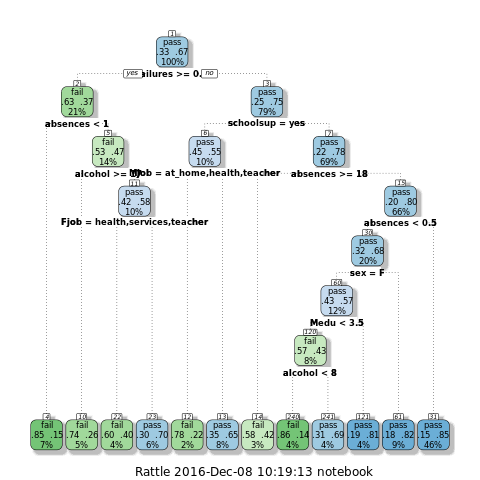

In [6]:
# Simple Decision Tree with all values
tree1 <- rpart(passed~sex+age+famsize+Pstatus+Medu+Fedu+Mjob+Fjob
            +traveltime+failures+schoolsup+famsup+romantic+famrel+freetime+absences+alcohol
            ,data= math, method="class")
# Plot a fancy and more informative tree
fancyRpartPlot(tree1)

#### 2.2.- Compare our prediction model 
Against the real values from portuguese data set.

In [7]:
# Making a prediction based on previous Tree
prediction1 <- predict(tree1, port, type = "class")

# Calculating the error
err1 <- table(prediction1 == port$passed)
prop.table(err1)



    FALSE      TRUE 
0.2280431 0.7719569 

#### 2.3.- First conclusions
We reached **77%** of correctness from our initial model, but of course from the tree diagram we can suspect a case of overfitting here, so lets start  a bit of overfiting  

### 3.- Analysis step by step

#### 3.1.- So, what's about alcohol? 
Lets make our first schema using only **alcohol** consumption and the number of **absences** (probably related).

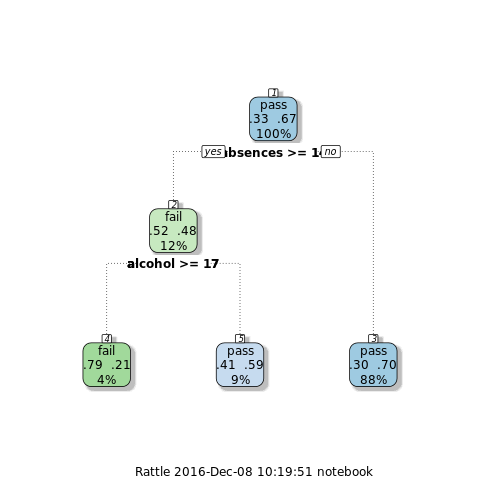

In [8]:
# Tree
tree2 <- rpart(passed~alcohol+absences, data= math, method="class")
# Plot
fancyRpartPlot(tree2)

The tree look pretty simple but lets check how good we've created our prediction:

In [9]:
# Prediction
prediction2 <- predict(tree2, port, type = "class")

# Error
diff2 <- table(prediction2 == port$passed)
prop.table(diff2)


    FALSE      TRUE 
0.1664099 0.8335901 

Not so bad, using only this two variables we've reached **83%** of accuracy.

#### 3.2.- What is the roll playing by parents here?
Let's build another schema using **parents** info this time.

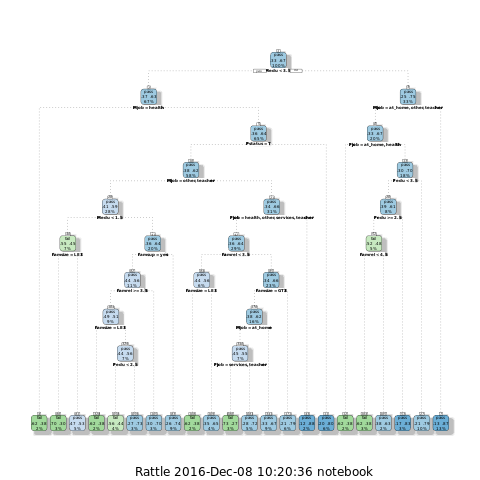

In [10]:
# Tree    
tree3 <- rpart(passed~famrel+famsize+Pstatus+Medu+Fedu+Mjob+Fjob
            +famsup+famrel,data= math, method="class",control=rpart.control(cp=0.005))
# Fancy plot
fancyRpartPlot(tree3)

Unfortunally using those attributes we only get a node and not a tree as error in plot states.
```{R}
Error in plot.rpart(tree3): fit is not a tree, just a root
```
After modify a bit the control of our partitioner (setting cp == 0.005) we were able to get a tree.

If we use **G3** value instead (tree above) we can generate a tree but if out of our scope its analysis, since we are only evaluating if student **passed** or not, so we need to move forward and keep looking for other relevant attributes.

From the manual of rpart
```
cp: complexity parameter.  Any split that does not decrease the overall lack of fit by a factor of ‘cp’ is not attempted. For instance, with ‘anova’ splitting, this means that the overall R-squared must increase by ‘cp’ at each step. The main role of this parameter is to save computing time by pruning off splits that are obviously not worthwhile.
```

In [11]:
# Prediction 
prediction3 <- predict(tree3, port, type = "class")

# Error
err3 <- table(prediction3 == port$passed)
prop.table(err3)


    FALSE      TRUE 
0.2881356 0.7118644 

And as expected this model does not given a good fit of our needs, so let's move on to another attributes.

#### 3.2.- All you need is love?
Let's see if this apply here, let's analyze **romantic** attribute also with **freetime**, **sex** and **age** values (probably related).

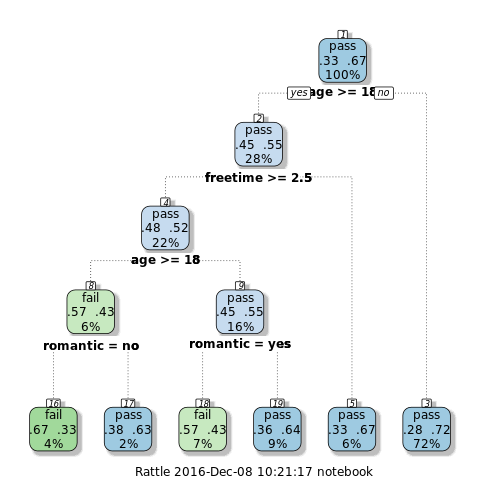

In [12]:
# Tree
tree4 <- rpart(passed~sex+age+romantic+freetime,data= math, method="class")
# Plot
fancyRpartPlot(tree4)

Well this tree looks a bit unbalanced, but lets the error says how well or bad we did it, using prediction again.

In [13]:
# Prediction
prediction4 <- predict(tree4, port, type = "class")

# Error
diff4 <- table(prediction4 == port$passed)
prop.table(diff4)


    FALSE      TRUE 
0.2064715 0.7935285 

Well it was a bit better than our first model for **2%**, reaching almost **80%** of correctness.

### 4.- A 'Clever' model

#### 4.1.- Relevant properties
As we saw in previous steps there a couple of factor which influence more, lets take those one and create a final tree. 

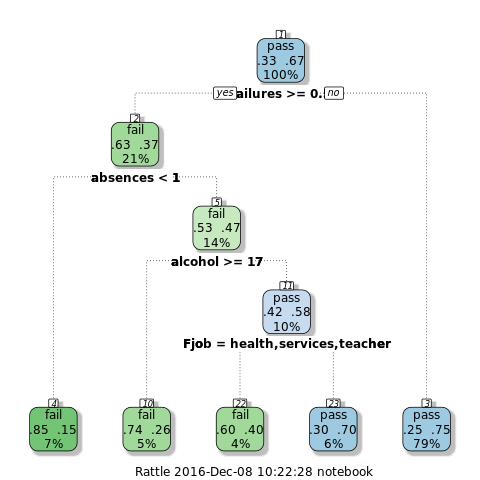

In [14]:
# Tree
tree5 <- rpart(passed~Mjob+Pstatus+Medu++Fjob+romantic+freetime+absences+alcohol+failures,data= math, method="class")
# Plot
fancyRpartPlot(tree5)

In [15]:
# Prediction
prediction5 <- predict(tree5, port, type = "class")
# Error
diff5 <- table(prediction5 == port$passed)
prop.table(diff5)


    FALSE      TRUE 
0.1587057 0.8412943 

#### 4.2.-  Less bether than none

After some reordering we were able to add a **1%** to our best prediction reaching **84%** of correct guesses.

### 5.- Conclusions

From this basic analysis we can make a few conclusions here:
* The main factor to determine the success of a student is its past, since people with previous **failures** tend to fail again. 
* Surprisingly student with **no absences** are more elegible to fail (sometimes is good to rest from school).
* Other dominant attributes are **alcohol** consumption and the **father's job**.

Must to be said that work with trees is not the best way to make predicitions, since usually they are built using greedy partitioning which as was proved many times could conduct us for not the best fit.

So in order to make more solid conclusions we need to include more advanced techniques of machine learning analysis.

### 6.- Future Work

Within the possibilities for future work are the following items:
* Use of **Random Forests** and other techniques of machine learning.
* Exchange data set and now train the model using portuguese data set and test it using math set.
* Use the full range of quaifycations for G3 instead of just passed or not valued.
* New analysis using **Local Data from local university**, and including parameters like *time consumed in social networks*, *previous year scores*, *etc.*